# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Machine Learning with Python\Achievement 1\Data Sets'

In [3]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed_scaled+month+date.csv'))
df_org = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
df_test = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [6]:
df.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [7]:
df_org.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [11]:
df_test.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Prepare the data for KNN

In [67]:
# Keep only the temeprature data
temp_columns = [col for col in df.columns if col.endswith('_temp_mean')]
df_temp = df[temp_columns]
df_temp

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0.747959,0.628750,-0.005167,0.898267,1.042841,0.440753,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,-0.000746,0.826301,0.517090,1.295755,-0.007287
22946,0.856604,0.367720,-0.005167,0.945734,1.278467,0.466330,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,-0.000746,1.074927,0.641496,1.358505,-0.007287
22947,0.856604,0.083991,-0.005167,0.914089,1.101748,0.786039,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,-0.000746,1.221178,0.716139,1.405568,-0.007287
22948,0.680055,0.265577,-0.005167,0.692578,0.880848,0.376811,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,-0.000746,1.235803,0.019467,0.668249,-0.007287


In [97]:
# Drop the month and date columns
df_test = df_test.drop(columns=['MONTH', 'DATE'], errors='ignore')
#df_org_filtered = df_org_filtered .drop(columns=['MONTH', 'DATE'], errors='ignore')
df_test

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
# Find missing weather stations in the answers dataset

def extract_prefixes(columns):
    return set(col.split('_')[0] for col in columns)

prefixes_df1 = extract_prefixes(df_temp.columns)
prefixes_df2 = extract_prefixes(df_test.columns)

# Compare the prefixes
missing_in_df2 = prefixes_df1 - prefixes_df2

print("Prefixes in df1 but NOT in df2:", missing_in_df2)

Prefixes in df1 but NOT in df2: {'ROMA', 'TOURS', 'GDANSK'}


In [99]:
# List of prefixes you want to remove
prefixes_to_remove = ['GDANSK', 'ROMA', 'TOURS']

# Filter out columns that start with any of the missing prefixes
df_filtered = df_temp[[col for col in df_temp.columns if not any(col.startswith(prefix) for prefix in prefixes_to_remove)]]
#df_org_filtered = df_org[[col for col in df_org.columns if not any(col.startswith(prefix) for prefix in prefixes_to_remove)]]

In [101]:
df_filtered.head()

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396


In [103]:
#df_org_filtered.head()

# Run KNN classifier

In [105]:
# Define X and y matrices
X = df_filtered
y = df_test

In [107]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [109]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [133]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)
       
    print(f"Train Accuracy: {train_acc[i]:.3f} | Test Accuracy: {test_acc[i]:.3f}")

i - 0
k - [1 2 3 4]
Train Accuracy: 1.000 | Test Accuracy: 0.409
i - 1
k - [1 2 3 4]
Train Accuracy: 0.537 | Test Accuracy: 0.423
i - 2
k - [1 2 3 4]
Train Accuracy: 0.527 | Test Accuracy: 0.426
i - 3
k - [1 2 3 4]
Train Accuracy: 0.486 | Test Accuracy: 0.434


In [135]:
y_pred

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

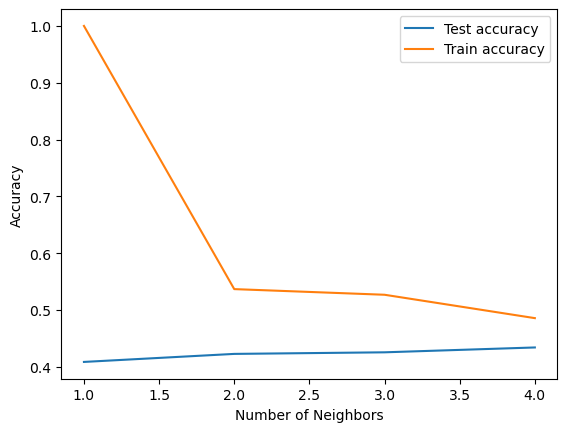

In [137]:
# Plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [151]:
# Find best k 
best_k_index = np.argmax(test_acc)
best_k = k_range[best_k_index]

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_model = MultiOutputClassifier(best_knn, n_jobs=-1)
best_model.fit(X_train, y_train)
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"Best K: {best_k}")
print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


Best K: 4
Train Accuracy: 0.486
Test Accuracy: 0.434


In [153]:
# Run the model for k = 5, 10, and 20
k_range = [5, 10, 20]  # <-- Just change this list
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Evaluate accuracy
    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)
    
    # Print results
    print(f"Train Accuracy: {train_acc[i]:.3f} | Test Accuracy: {test_acc[i]:.3f}")

i - 0
k - 5
Train Accuracy: 0.487 | Test Accuracy: 0.434
i - 1
k - 10
Train Accuracy: 0.464 | Test Accuracy: 0.445
i - 2
k - 20
Train Accuracy: 0.453 | Test Accuracy: 0.444


C:\Users\asicz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


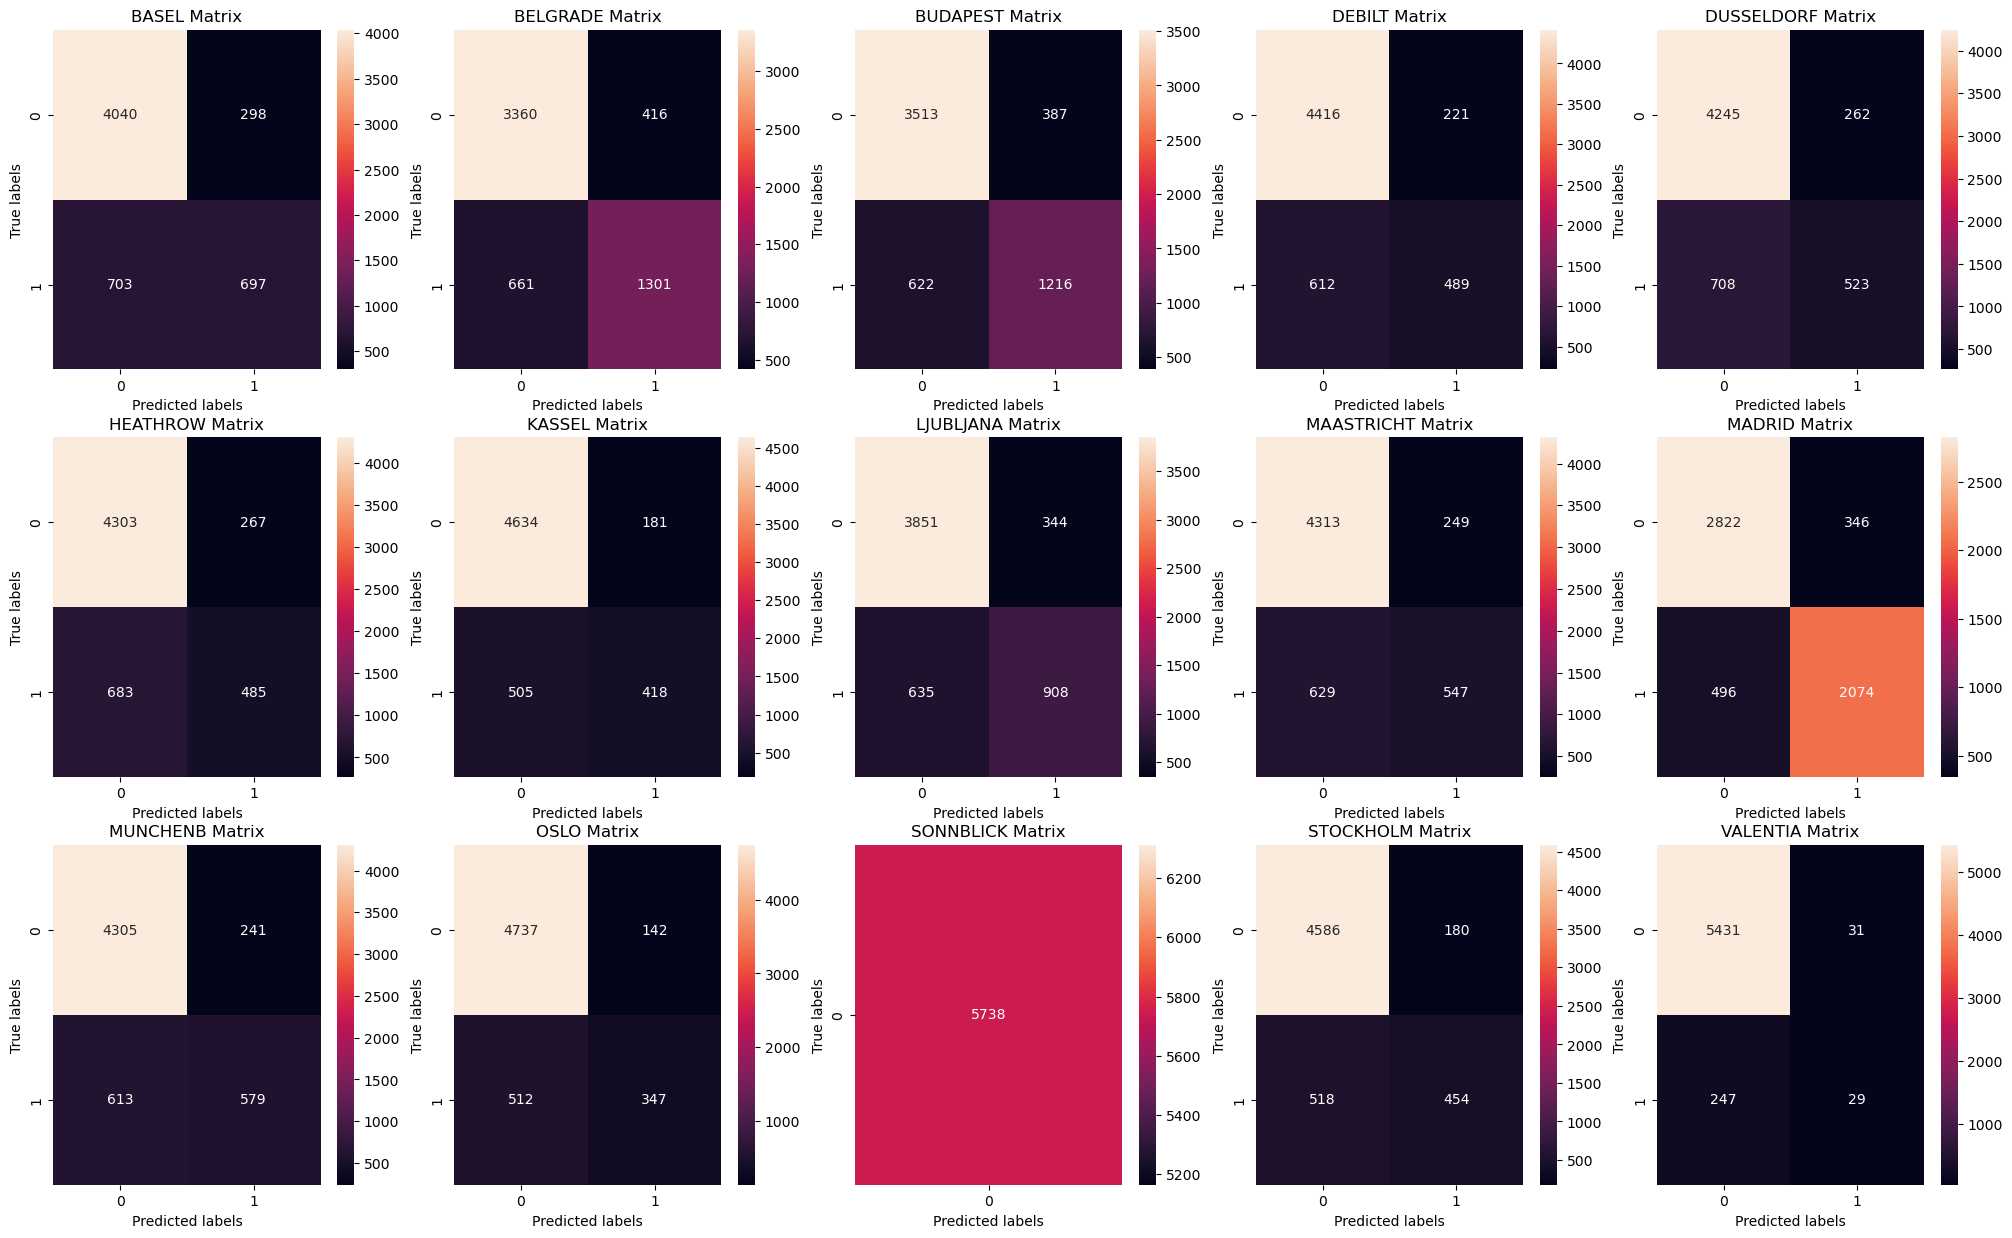

In [147]:
# Create confusion matrix
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [155]:
results = []

for count, station in enumerate(locations):
    cm = confusion_matrix(y_test[station + key], y_pred[:, count])
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    results.append({
        "Station": station,
        "TP": cm[0, 0],
        "FN": cm[0, 1],
        "FP": cm[1, 0],
        "TN": cm[1, 1],
        "Accuracy (%)": round(accuracy * 100, 2)
    })

results_df = pd.DataFrame(results)
print(results_df)

C:\Users\asicz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


IndexError: index 1 is out of bounds for axis 0 with size 1

In [157]:
# Accuracy per weather station

from sklearn.metrics import confusion_matrix
import pandas as pd

results = []

for count, station in enumerate(locations):
    # Always compute 2x2 confusion matrix with labels [0, 1]
    cm = confusion_matrix(y_test[station + key], y_pred[:, count], labels=[0, 1])
    
    # If a class is missing, cm might not be 2x2, so pad it manually
    if cm.shape != (2, 2):
        full_cm = np.zeros((2, 2), dtype=int)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                full_cm[i, j] = cm[i, j]
        cm = full_cm

    # Compute accuracy
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum() if cm.sum() > 0 else 0

    results.append({
        "Station": station,
        "True Positive (Pleasant)": cm[0, 0],
        "False Negative": cm[0, 1],
        "False Positive": cm[1, 0],
        "True Negative (Unpleasant)": cm[1, 1],
        "Accuracy (%)": round(accuracy * 100, 2)
    })

results_df = pd.DataFrame(results)
print(results_df)


       Station  True Positive (Pleasant)  False Negative  False Positive  \
0        BASEL                      3983             355             541   
1     BELGRADE                      3227             549             438   
2     BUDAPEST                      3387             513             351   
3       DEBILT                      4420             217             543   
4   DUSSELDORF                      4206             301             612   
5     HEATHROW                      4238             332             580   
6       KASSEL                      4612             203             429   
7    LJUBLJANA                      3767             428             432   
8   MAASTRICHT                      4291             271             505   
9       MADRID                      2742             426             270   
10    MUNCHENB                      4273             273             517   
11        OSLO                      4733             146             469   
12   SONNBLI